In [265]:
import numpy as np
from sklearn.linear_model import LinearRegression
import sys,os
import matplotlib.pyplot as plt
from itertools import product
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.lines import Line2D
sys.path.append(os.getcwd()+'/A4lib')
from A4lib import utils as a4ut
import importlib
importlib.reload(a4ut)


<module 'A4lib.utils' from '/Users/huangrong/Private/Hui/Sweden/LNU/S2/DeepLearning/Assignment/Main/A4lib/utils.py'>

## Repeat gradient descent with two (and more) variables

Slope (a): 1.6226270306326736
Intercept (b): -1.8958575765407035


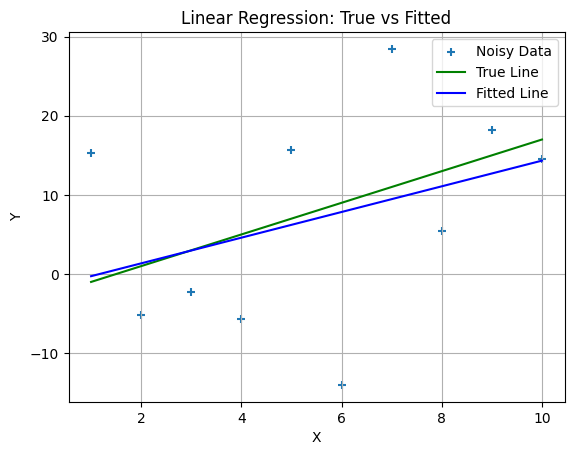

In [223]:

# Set random seed for reproducibility
np.random.seed(1)

# Parameters
N = 10      # Number of data points
a0 = 2   # True slope
b0 = -3  # True intercept

# Generate data
X = np.arange(1, N + 1)
noise = np.random.normal(0, 10, N)
Y = a0 * X + b0 + noise

# Plot noisy data
plt.scatter(X, Y, marker='+', label='Noisy Data')

# Plot true model
plt.plot(X, a0 * X + b0, color='green', label='True Line')

# Fit linear regression model
model = LinearRegression()
X_reshaped = X.reshape(-1, 1)  # sklearn expects 2D input
model.fit(X_reshaped, Y)
Y_pred = model.predict(X_reshaped)
print("Slope (a):", model.coef_[0])
print("Intercept (b):", model.intercept_)
# Plot fitted model
plt.plot(X, Y_pred, color='blue', label='Fitted Line')

# Plot decorations
plt.legend()
plt.title("Linear Regression: True vs Fitted")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.show()


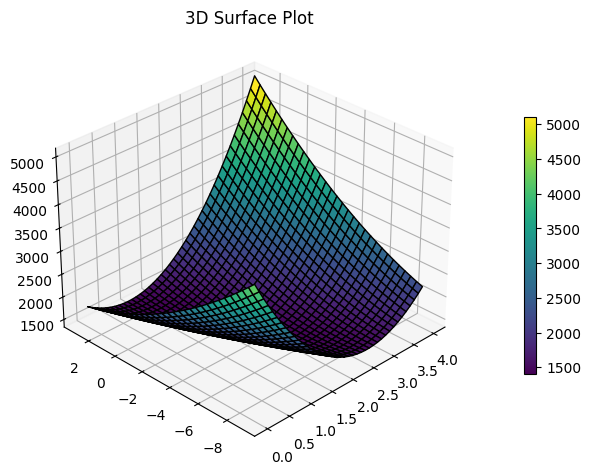

In [224]:
f = lambda a, b: a4ut.rss2(a, b, X, Y)

a_vals = np.arange(a0-2, a0+2+1e-8, 0.1)
b_vals = np.arange(b0-6, b0+6+1e-8, 0.4)
A, B = np.meshgrid(a_vals, b_vals)

a4ut.plot3d(f, A, B)
plt.show()

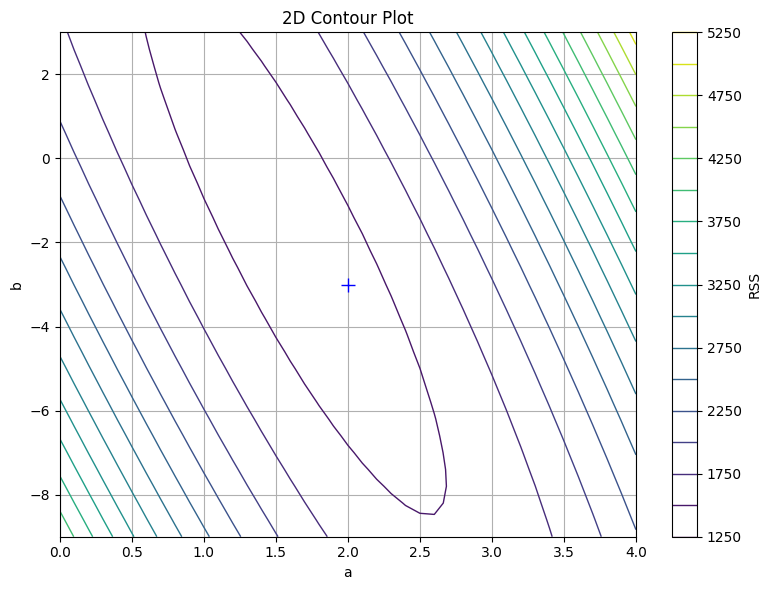

In [225]:
f = lambda a, b: a4ut.rss2(a, b, X, Y)

# Use a small epsilon like 1e-9 for arange stop value inclusivity
a_vals = np.arange(a0-2, a0+2+1e-8, 0.1)
b_vals = np.arange(b0-6, b0+6+1e-8, 0.4)
A, B = np.meshgrid(a_vals, b_vals)

# Call the new 2D contour function, show colorbar, and mark the point (a0, b0)
fig, ax = a4ut.plot2d_contour(f, A, B, show_colorbar=True, mark_point=(a0, b0))

# Display the plot
plt.show()

The gradient descent find the minimum.

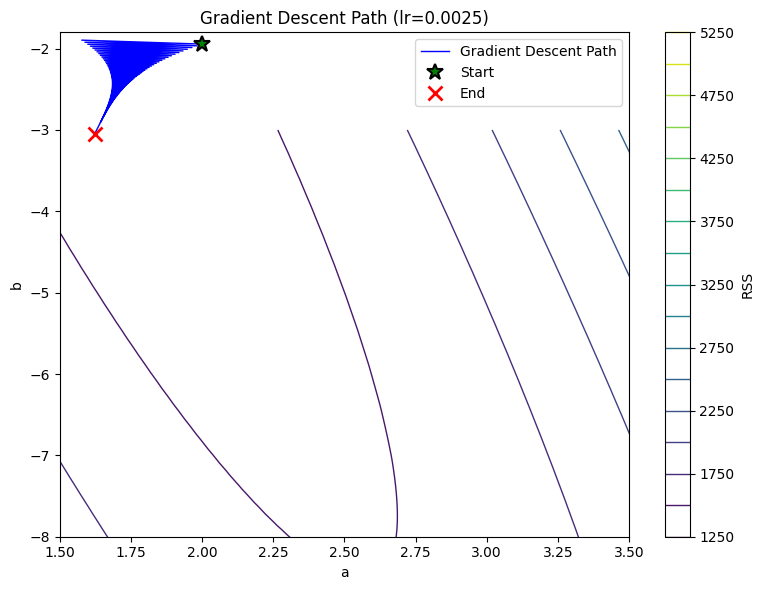

Final parameters from gradient descent:
a: 1.6226312822169182, b: -1.8958871753150044


In [226]:

# Parameters
K = 1000
learning_eps = 0.0025 # Higher learning rate produces oscillation pattern

# Define cost and gradient functions
f_cost = lambda a, b: a4ut.rss2(a, b, X, Y)
ff_grad = lambda a, b: a4ut.grad_rss2(a, b, X, Y)

# Run gradient descent
a_history, b_history = a4ut.grad_desc_rss2(
    K, a0, b0, learning_eps, f_cost, ff_grad, verbose=False
)


# Create the contour plot with gradient descent path
a_vals = np.linspace(0, 4, 100) # Adjust ranges to match your image
b_vals = np.linspace(-12, -3, 100)
A, B = np.meshgrid(a_vals, b_vals)

# Create the plot with the path
fig, ax = a4ut.plot2d_contour(
    f_cost, A, B, 
    show_colorbar=True,
    show_path=True, 
    a_history=a_history, 
    b_history=b_history,
    learning_rate=learning_eps,
    flip_path=True
)

# Remove grid if you want a cleaner look like in your image
ax.grid(False)

# Set axis limits to match the image
ax.set_xlim(1.5, 3.5) # Adjust as needed
ax.set_ylim(-8, -1.8)   # Adjust as needed

plt.show()

print("Final parameters from gradient descent:")
print(f"a: {a_history[-1]}, b: {b_history[-1]}")
# Plot the final parameters

final result


Orig: a=1.62 b=-1.90 loss=1406.49


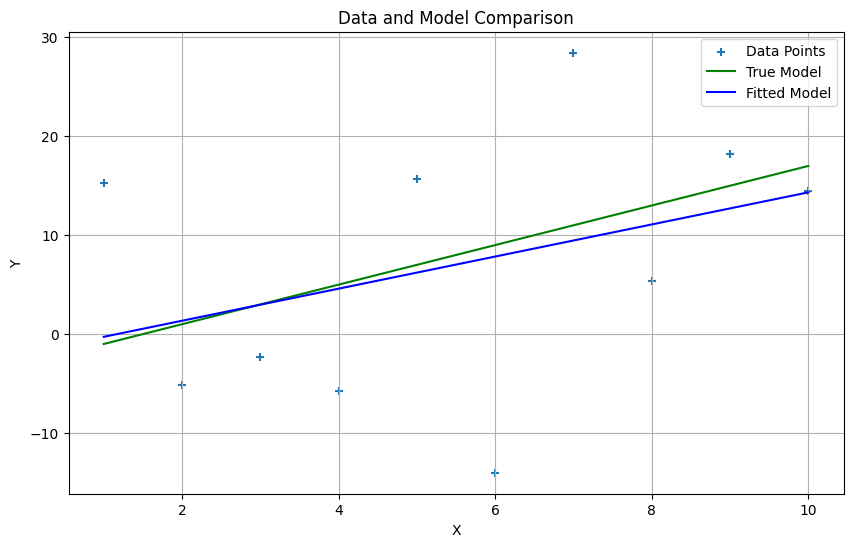

In [227]:
# Get final values after gradient descent
a_orig = a_history[-1]  # Last value in a_history (equivalent to as(K+1))
b_orig = b_history[-1]  # Last value in b_history (equivalent to bs(K+1))

# Print the results like the MATLAB fprintf
print(f"Orig: a={a_orig:.2f} b={b_orig:.2f} loss={a4ut.rss2(a_orig, b_orig, X, Y):.2f}")

# Create the scatter plot with lines for true and fitted models
plt.figure(figsize=(10, 6))

# Plot the data points with '+' markers
plt.scatter(X, Y, marker='+', label='Data Points')

# Plot the true model (green line)
plt.plot(X, a0 * X + b0, color='g', label='True Model')

# Plot the model after gradient descent (blue line)
plt.plot(X, a_orig * X + b_orig, color='b', label='Fitted Model')

# Add title, labels and legend
plt.title('Data and Model Comparison')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

In my case, after gradient descent the result is sltily different from the linear regression, it's hard to see the different from the plot. So i put the result here.

##### linear regression :
Slope (a): 1.6226270306326736
Intercept (b): -1.8958575765407035

##### Final parameters from gradient descent:
a: 1.6226312822169182, b: -1.8958871753150044

## Regularization with the  𝐿2  Norm

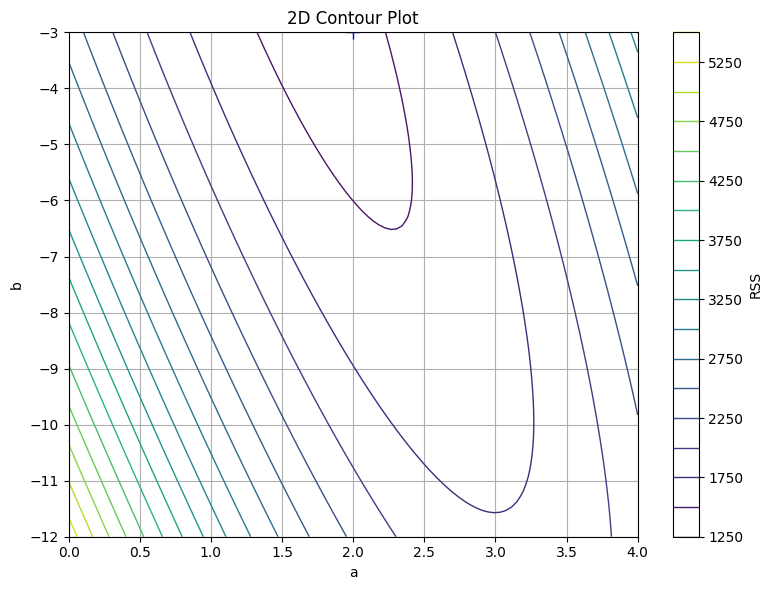

In [228]:
alpha = 1
fl2 = lambda a, b: a4ut.rss2(a, b, X, Y) + alpha * (a**2 + b**2)

# Call the new 2D contour function, show colorbar, and mark the point (a0, b0)
fig, ax = a4ut.plot2d_contour(fl2, A, B, show_colorbar=True, mark_point=(a0, b0), flip_path=True)

# Set axis limits to match the image

# ax.set_ylim(-10,0)   # Adjust as needed
plt.show()


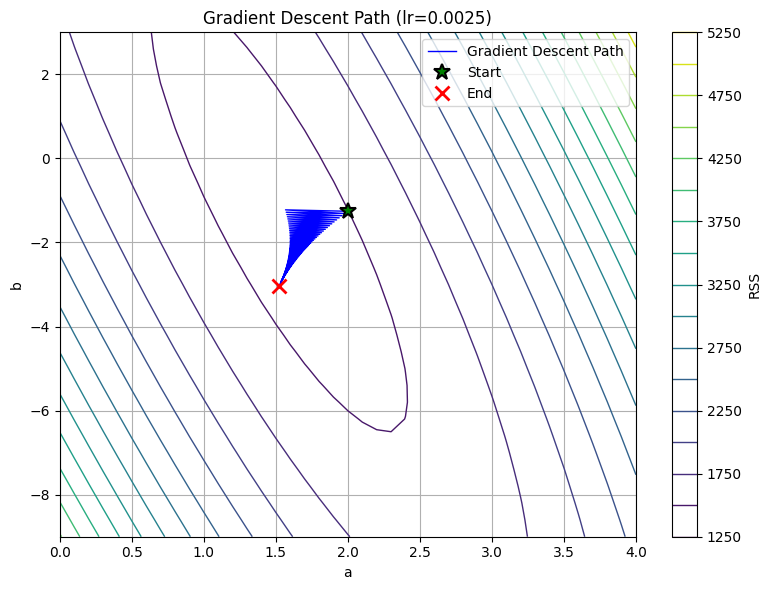

In [229]:
ffL2 = lambda a, b: ff_grad(a, b) + np.array([2 * alpha * a, 2 * alpha * b])
k = 1000

learning_eps = 0.0025
a_history, b_history = a4ut.grad_desc_rss2(
    k, a0, b0, learning_eps, fl2, ffL2, verbose=False
)

a_vals = np.arange(a0-2, a0+2 + 1e-8, 0.1)
b_vals = np.arange(b0-6, b0+6 + 1e-8, 0.4)
A, B   = np.meshgrid(a_vals, b_vals)

# Create the meshgrid
A, B = np.meshgrid(a_vals, b_vals)

a4ut.plot2d_contour(
    fl2, A, B, 
    show_colorbar=True,
    show_path=True, 
    a_history=a_history, 
    b_history=b_history,
    learning_rate=learning_eps,
    flip_path=True
)
plt.show()

Final parameters from gradient descent with L2 regularization:
a: 1.5226098218848187, b: -1.223420927841142
Orig: a=1.52 b=-1.22 loss=1407.47


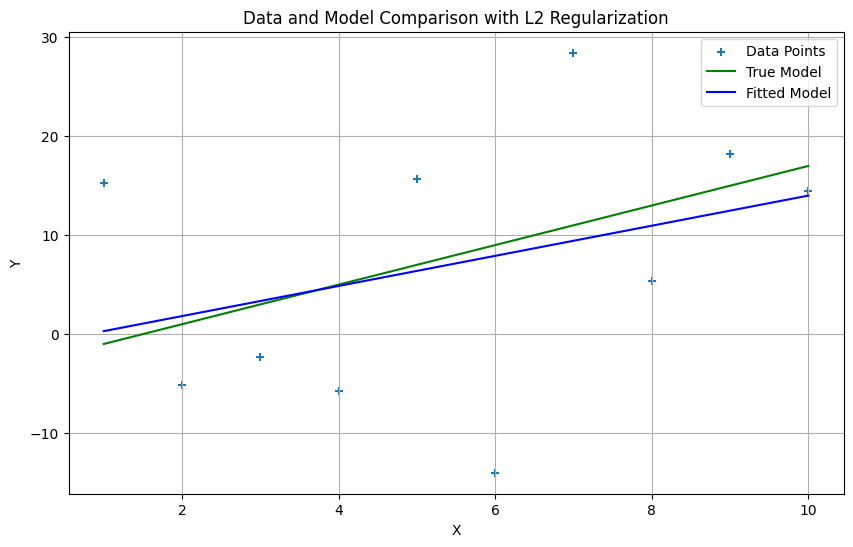

In [230]:
print("Final parameters from gradient descent with L2 regularization:")
print(f"a: {a_history[-1]}, b: {b_history[-1]}")
# Plot the final parameters with L2 regularization
# Get final values after gradient descent
a_orig = a_history[-1]  # Last value in a_history (equivalent to as(K+1))
b_orig = b_history[-1]  # Last value in b_history (equivalent to bs(K+1))
# Print the results like the MATLAB fprintf
print(f"Orig: a={a_orig:.2f} b={b_orig:.2f} loss={a4ut.rss2(a_orig, b_orig, X, Y):.2f}")
# Create the scatter plot with lines for true and fitted models
plt.figure(figsize=(10, 6))
# Plot the data points with '+' markers
plt.scatter(X, Y, marker='+', label='Data Points')
# Plot the true model (green line)
plt.plot(X, a0 * X + b0, color='g', label='True Model')
# Plot the model after gradient descent (blue line)
plt.plot(X, a_orig * X + b_orig, color='b', label='Fitted Model')
# Add title, labels and legend
plt.title('Data and Model Comparison with L2 Regularization')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
# Show the plot
plt.show()


## Parameter Tying

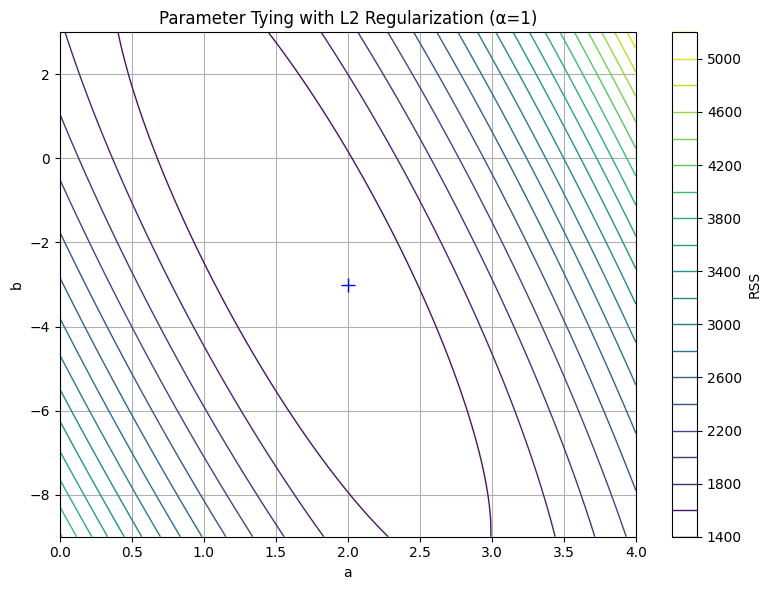

In [231]:
# Define regularization parameter
alpha = 1

# Define the cost function with parameter tying L2 regularization
def fL2_tying(a, b):
    """
    Cost function with parameter tying L2 regularization:
    RSS + alpha * ((a-a0)^2 + (b-b0)^2)
    """
    return a4ut.rss2(a, b, X, Y) + alpha * ((a-a0)**2 + (b-b0)**2)

# Create the meshgrid for visualization (translating MATLAB syntax)
a_vals = np.arange(a0-2, a0+2+0.01, 0.01)  # Adding small increment to include endpoint
b_vals = np.arange(b0-6, b0+6+0.01, 0.01)
A, B = np.meshgrid(a_vals, b_vals)

# Plot using the 3D contour function (using plot2d_contour since that's what you have)
fig, ax = a4ut.plot2d_contour(fL2_tying, A, B, show_colorbar=True, 
                             mark_point=(a0, b0),
                             levels=20)  # More levels for smoother contours

# Add title
plt.title(f'Parameter Tying with L2 Regularization (α={alpha})')
plt.show()

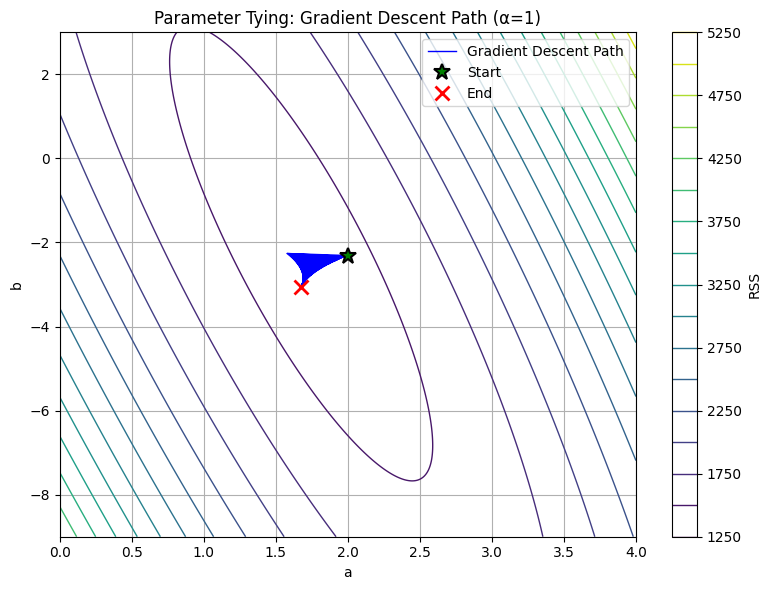

Parameter Tying: a=1.68 b=-2.26 loss=1406.78


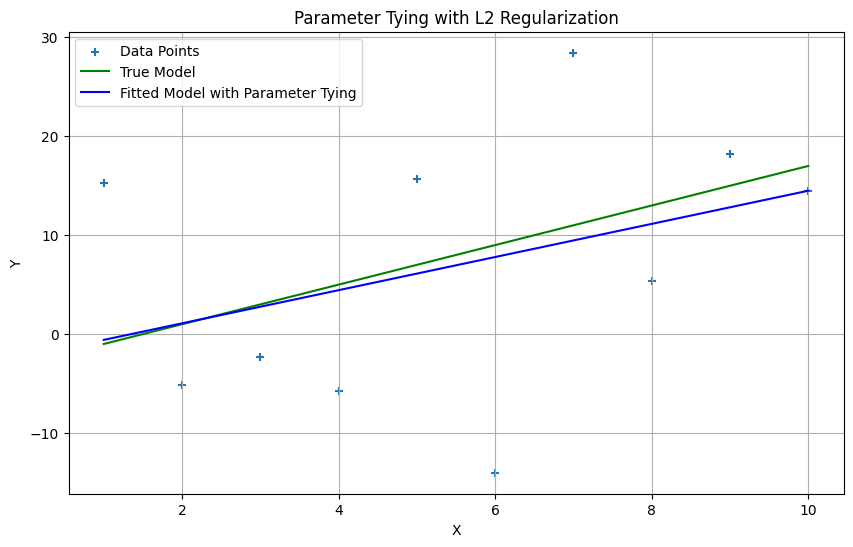

In [232]:
# Define the gradient function with parameter tying L2 regularization
def grad_fL2_tying(a, b):
    """
    Gradient of the cost function with parameter tying L2 regularization
    """
    original_grad = a4ut.grad_rss2(a, b, X, Y)
    tying_grad = np.array([2 * alpha * (a-a0), 2 * alpha * (b-b0)])
    return original_grad + tying_grad

# Alternative as lambda (similar to MATLAB syntax)
ffL2_tying = lambda a, b: a4ut.grad_rss2(a, b, X, Y) + np.array([2 * alpha * (a-a0), 2 * alpha * (b-b0)])

# Run gradient descent with parameter tying
K = 1000
learning_eps = 0.0025
a_history_tying, b_history_tying = a4ut.grad_desc_rss2(
    K, a0, b0, learning_eps, fL2_tying, ffL2_tying, verbose=False
)

# Visualize the gradient descent path on the contour plot
fig, ax = a4ut.plot2d_contour(
    fL2_tying, A, B,
    show_colorbar=True,
    show_path=True,
    a_history=a_history_tying,
    b_history=b_history_tying,
    learning_rate=learning_eps,
    flip_path=True
)

# Set a clear title
plt.title(f'Parameter Tying: Gradient Descent Path (α={alpha})')
plt.show()

# Print the results
print(f"Parameter Tying: a={a_history_tying[-1]:.2f} b={b_history_tying[-1]:.2f} loss={a4ut.rss2(a_history_tying[-1], b_history_tying[-1], X, Y):.2f}")

# Plot the data with the final model
plt.figure(figsize=(10, 6))
plt.scatter(X, Y, marker='+', label='Data Points')
plt.plot(X, a0 * X + b0, color='g', label='True Model')
plt.plot(X, a_history_tying[-1] * X + b_history_tying[-1], color='b', label='Fitted Model with Parameter Tying')
plt.title('Parameter Tying with L2 Regularization')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()

In my case, the parameters is getting closer to ground truth. while loss is kind of bouncing.

## Regularization with the  𝐿1  Norm

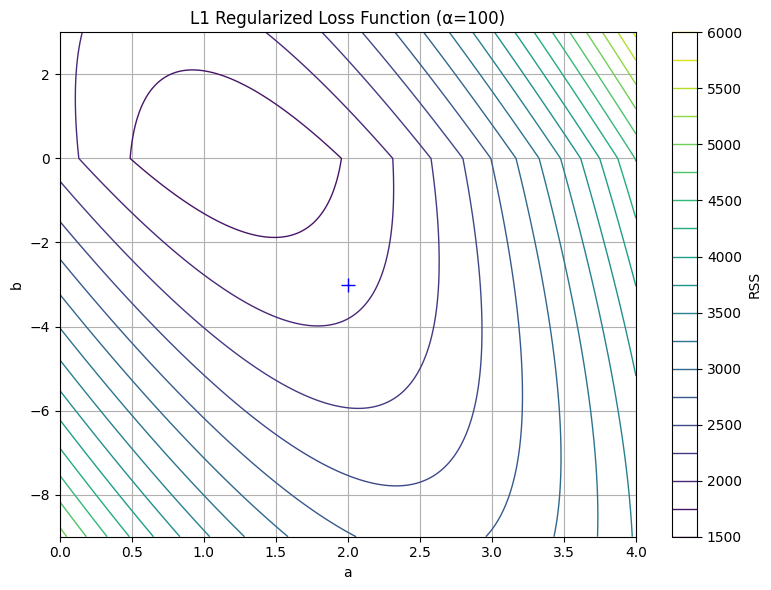

In [233]:
# Define L1 regularization parameter
alpha = 100  # High alpha value to observe sparsity effects

# Define the cost function with L1 regularization
def fL1(a, b):
    """
    Cost function with L1 regularization:
    RSS + alpha * (|a| + |b|)
    """
    return a4ut.rss2(a, b, X, Y) + alpha * (abs(a) + abs(b))

# Create the meshgrid for visualization
a_vals = np.arange(a0-2, a0+2+0.01, 0.01)  # Adding small increment to include endpoint
b_vals = np.arange(b0-6, b0+6+0.01, 0.04)  # Step size 0.04
A, B = np.meshgrid(a_vals, b_vals)

# Plot the contour using the 2D contour function
fig, ax = a4ut.plot2d_contour(
    fL1, A, B, 
    show_colorbar=True,
    mark_point=(a0, b0),
    levels=20
)

plt.title(f'L1 Regularized Loss Function (α={alpha})')
plt.show()

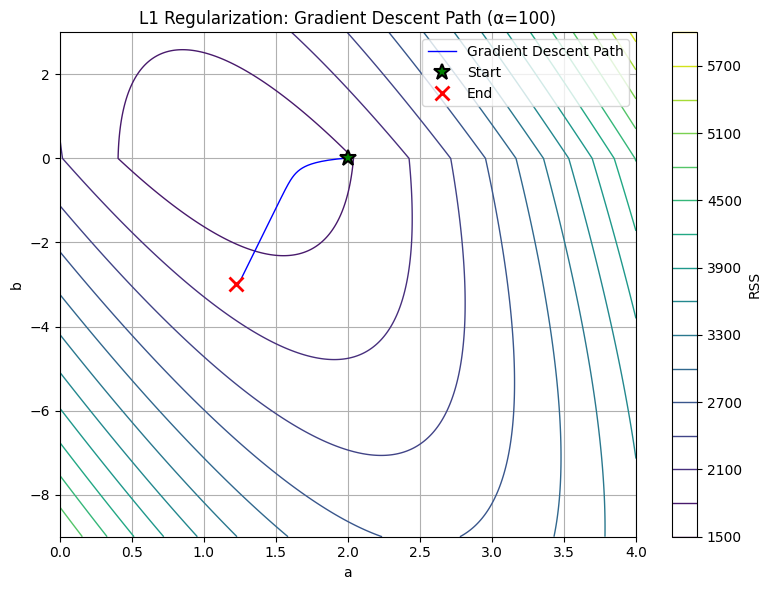

L1 regularization: a=1.22 b=0.01 loss=1420.65


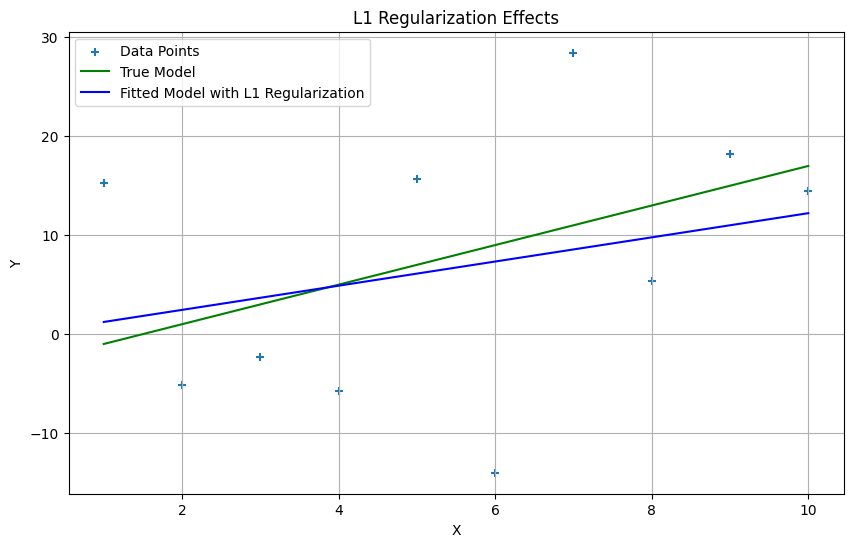

In [234]:
# Define the gradient function for L1 regularization
def ffL1(a, b):
    """
    Gradient of the cost function with L1 regularization
    """
    original_grad = a4ut.grad_rss2(a, b, X, Y)
    l1_grad = np.array([alpha * np.sign(a), alpha * np.sign(b)])
    return original_grad + l1_grad

# Run gradient descent with L1 regularization
K = 5000  # More iterations for L1 (matches MATLAB)
learning_eps = 0.0001  # Lower learning rate for stability
a_history_l1, b_history_l1 = a4ut.grad_desc_rss2(
    K, a0, b0, learning_eps, fL1, ffL1, verbose=False
)

# Visualize the gradient descent path
fig, ax = a4ut.plot2d_contour(
    fL1, A, B,
    show_colorbar=True,
    show_path=True,
    a_history=a_history_l1,
    b_history=b_history_l1,
    learning_rate=learning_eps,
    flip_path=True
)

# Set a clear title
plt.title(f'L1 Regularization: Gradient Descent Path (α={alpha})')
plt.show()

# Print the results
print(f"L1 regularization: a={a_history_l1[-1]:.2f} b={b_history_l1[-1]:.2f} loss={a4ut.rss2(a_history_l1[-1], b_history_l1[-1], X, Y):.2f}")

# Plot the data with the final model
plt.figure(figsize=(10, 6))
plt.scatter(X, Y, marker='+', label='Data Points')
plt.plot(X, a0 * X + b0, color='g', label='True Model')
plt.plot(X, a_history_l1[-1] * X + b_history_l1[-1], color='b', label='Fitted Model with L1 Regularization')
plt.title('L1 Regularization Effects')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()

The loss became larger than the previous one. But it's just a little bit. from 1406.78 to 1420.65. 


## Regularization with the  𝐿2  Norm constraint
### Regularization with the  𝐿2  Norm equality constraint

Final gradient: [ 4.87446666e-02 -4.44257593e-04 -2.39416992e+01]


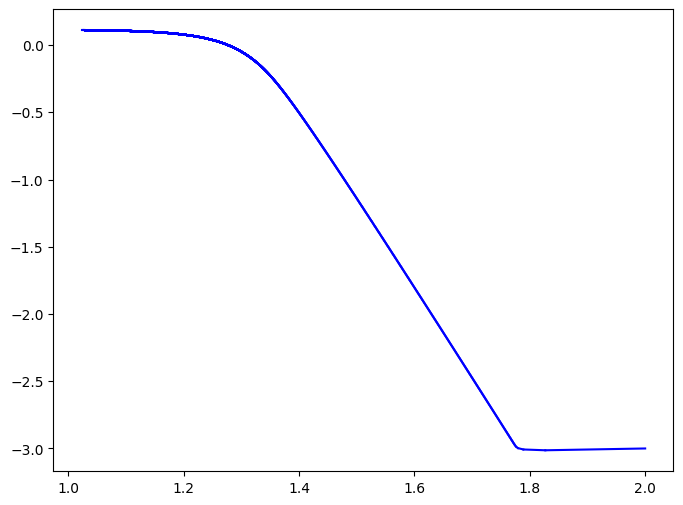

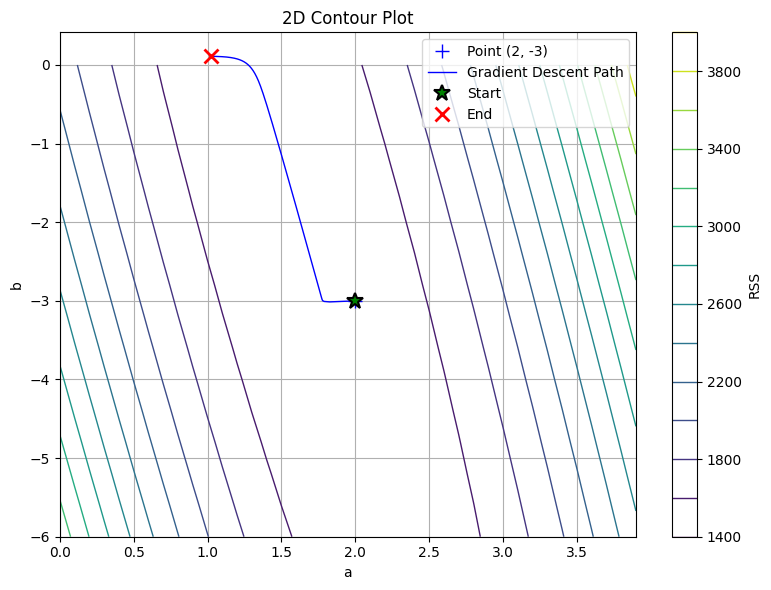

L2 equality constraint results:
a = 1.0229, b = 0.1097, alpha = 117.9273
Constraint verification: a^2 + b^2 = 1.0583, target c = 25.0000
Loss = 1452.8873


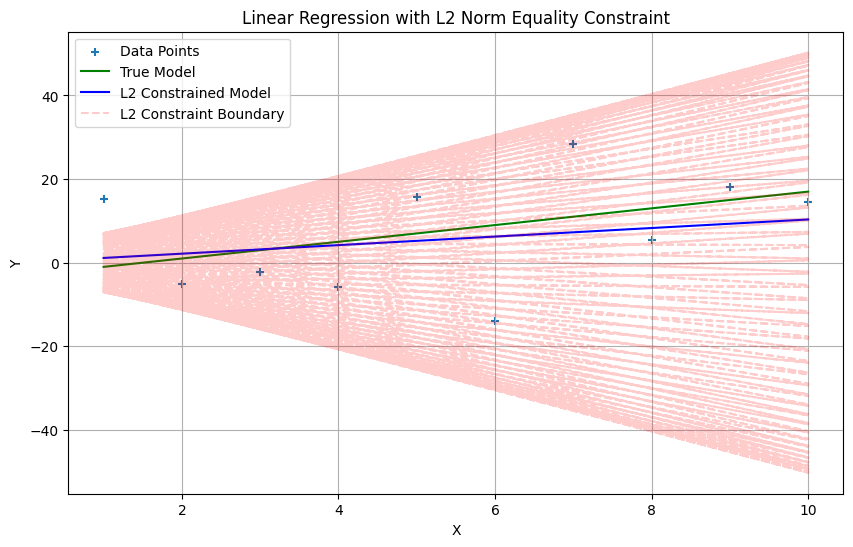

In [239]:
# Set parameters for L2 norm equality constraint
K = 5000
learning_eps = 0.001
c = (2+1)**2 + (3+1)**2  # Set constraint value c = 25

# Define Lagrangian function for L2 norm equality constraint
fL2c = lambda a, b, alpha: f_cost(a, b) + alpha * (a**2 + b**2 - c)

# Define gradient function for the Lagrangian
ffL2c = lambda a, b, alpha: a4ut.grad_rss3e(a, b, alpha, c, X, Y)

# Initial value for Lagrange multiplier
alpha0 = 1

# Run gradient descent with L2 norm equality constraint
a_history, b_history, alpha_history = a4ut.grad_desc_rss3e(
    K, a0, b0, alpha0, learning_eps, f_cost, fL2c, ffL2c, verbose=True
)

# Print the results
print(f"L2 equality constraint results:")
print(f"a = {a_history[-1]:.4f}, b = {b_history[-1]:.4f}, alpha = {alpha_history[-1]:.4f}")
print(f"Constraint verification: a^2 + b^2 = {a_history[-1]**2 + b_history[-1]**2:.4f}, target c = {c:.4f}")
print(f"Loss = {f_cost(a_history[-1], b_history[-1]):.4f}")

# Create visualization of the result
plt.figure(figsize=(10, 6))
plt.scatter(X, Y, marker='+', label='Data Points')
plt.plot(X, a0 * X + b0, color='g', label='True Model')
plt.plot(X, a_history[-1] * X + b_history[-1], color='b', label='L2 Constrained Model')

# Add circle to visualize the constraint
theta = np.linspace(0, 2*np.pi, 100)
a_circle = np.sqrt(c) * np.cos(theta)
b_circle = np.sqrt(c) * np.sin(theta)
X_circle = np.arange(1, N + 1)
Y_circle = []
for i in range(len(theta)):
    Y_circle.append(a_circle[i] * X_circle + b_circle[i])
    
plt.plot(np.concatenate([X_circle for _ in range(len(theta))]), 
         np.concatenate(Y_circle), 
         'r--', alpha=0.2, label='L2 Constraint Boundary')

plt.title('Linear Regression with L2 Norm Equality Constraint')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()

### Regularization with the  𝐿2  Norm inequality constraint


Final gradient:
  ∂L/∂a      = 0.115861
  ∂L/∂b      = -0.294714
  ∂L/∂α      = -23.303567
  ∂L/∂s      = 0.000078


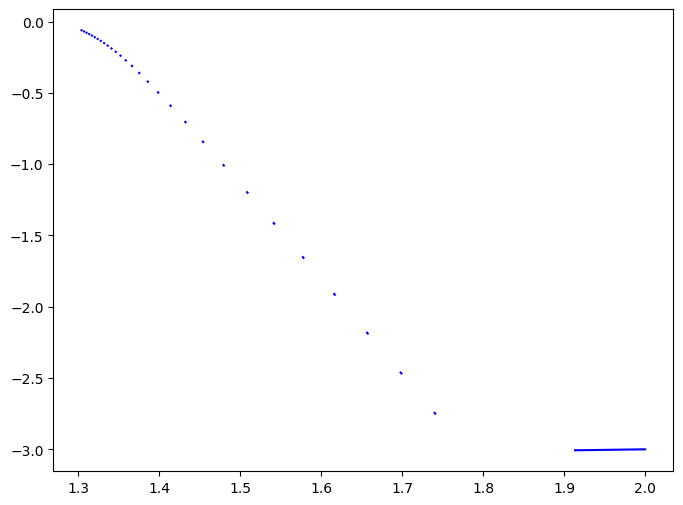

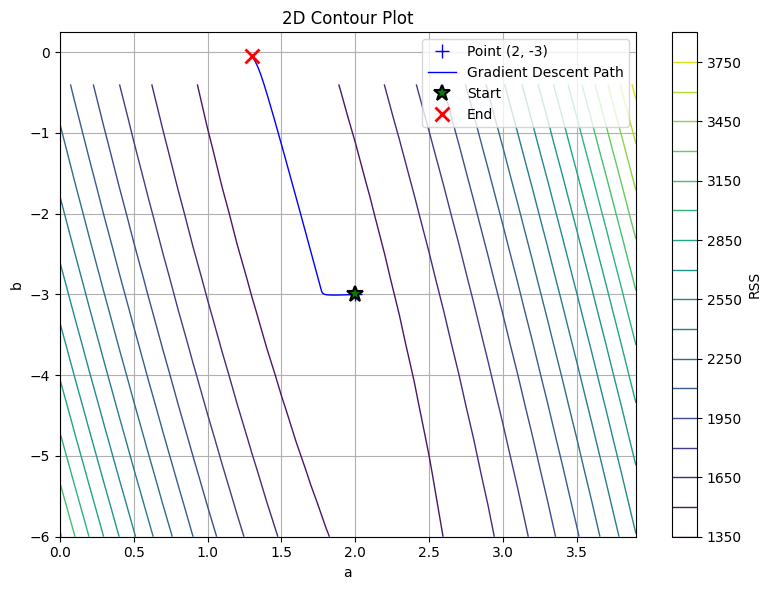

L2 inequality constraint results:
a = 1.3014, b = -0.0529, alpha = 17.1883, s = 0.0000
Constraint verification: a^2 + b^2 = 1.6964, target c = 25.0000
Loss = 1415.0616


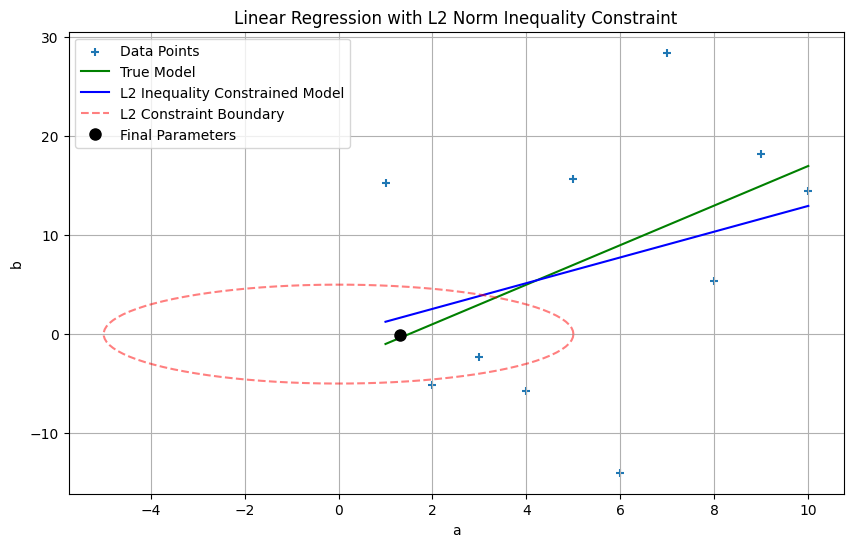

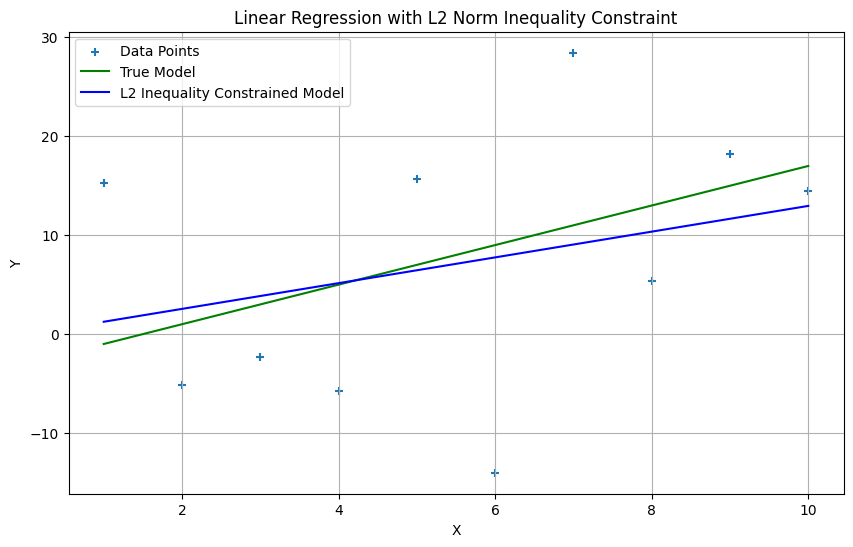

In [246]:
import importlib
importlib.reload(a4ut)

# Set parameters for L2 norm inequality constraint
K = 1500
learning_eps = 0.0005
c = (2+1)**2 + (3+1)**2  # Set constraint value c = 25

# Define Lagrangian function for L2 norm inequality constraint using slack variable
def fL2c_inequality(a, b, alpha, s):
    """Lagrangian for L2 norm inequality constraint using slack variable"""
    return f_cost(a, b) + alpha * (a**2 + b**2 - c + s**2)

# Define gradient function for the Lagrangian
ffL2c_inequality = lambda a, b, alpha, s: a4ut.grad_rss3(a, b, alpha, s, c, X, Y)

# Initial values
alpha0 = 1
s0 = 1  # Initial slack variable value

# Run gradient descent with L2 norm inequality constraint
a_history, b_history, alpha_history, s_history = a4ut.grad_desc_rss3(
    K, a0, b0, alpha0, s0, learning_eps, f_cost, fL2c_inequality, ffL2c_inequality, verbose=True
)

# Print the results
print(f"L2 inequality constraint results:")
print(f"a = {a_history[-1]:.4f}, b = {b_history[-1]:.4f}, alpha = {alpha_history[-1]:.4f}, s = {s_history[-1]:.4f}")
print(f"Constraint verification: a^2 + b^2 = {a_history[-1]**2 + b_history[-1]**2:.4f}, target c = {c:.4f}")
print(f"Loss = {f_cost(a_history[-1], b_history[-1]):.4f}")

# Create visualization of the result
plt.figure(figsize=(10, 6))
plt.scatter(X, Y, marker='+', label='Data Points')
plt.plot(X, a0 * X + b0, color='g', label='True Model')
plt.plot(X, a_history[-1] * X + b_history[-1], color='b', label='L2 Inequality Constrained Model')

# Add circle to visualize the constraint boundary
theta = np.linspace(0, 2*np.pi, 100)
a_circle = np.sqrt(c) * np.cos(theta)
b_circle = np.sqrt(c) * np.sin(theta)

plt.plot(a_circle, b_circle, 'r--', alpha=0.5, label='L2 Constraint Boundary')
plt.plot(a_history[-1], b_history[-1], 'ko', markersize=8, label='Final Parameters')

plt.title('Linear Regression with L2 Norm Inequality Constraint')
plt.xlabel('a')
plt.ylabel('b')
plt.legend()
plt.grid(True)
plt.show()

# Plot the data with the final model
plt.figure(figsize=(10, 6))
plt.scatter(X, Y, marker='+', label='Data Points')
plt.plot(X, a0 * X + b0, color='g', label='True Model')
plt.plot(X, a_history[-1] * X + b_history[-1], color='b', label='L2 Inequality Constrained Model')
plt.title('Linear Regression with L2 Norm Inequality Constraint')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()

In [247]:
# Check the original unconstrained solution
print(f"Original solution: a={a_orig:.4f}, b={b_orig:.4f}")

# Calculate constraint value for the unconstrained solution
c = (2+1)**2 + (3+1)**2  # = 25
constraint_value = a_orig**2 + b_orig**2 - c
print(f"Constraint value a²+b²-c = {constraint_value:.4f}")

# Check if the unconstrained solution satisfies the constraint
if constraint_value <= 0:
    print("✓ Unconstrained solution already satisfies the constraint (inactive)")
    print("  → KKT satisfied with α = 0 (Case 3a)")
else:
    print("✗ Unconstrained solution violates the constraint")
    print("  → Need active constraint with α > 0 (Case 3b)")
    
    # For case 3b, we need the constrained solution
    # Check the constrained solution from your inequality constraint implementation
    print("\nConstrained solution:")
    print(f"a={a_history[-1]:.4f}, b={b_history[-1]:.4f}, α={alpha_history[-1]:.4f}")
    
    # Calculate constraint value for the constrained solution
    constrained_constraint = a_history[-1]**2 + b_history[-1]**2 - c
    print(f"Constraint value a²+b²-c = {constrained_constraint:.6f}")
    
    # Check complementary slackness
    comp_slackness = alpha_history[-1] * constrained_constraint
    print(f"Complementary slackness α(a²+b²-c) = {comp_slackness:.6f}")
    
    # Check gradient condition
    grad_a = -2 * np.sum((Y - (a_history[-1]*X + b_history[-1])) * X) + 2 * alpha_history[-1] * a_history[-1]
    grad_b = -2 * np.sum(Y - (a_history[-1]*X + b_history[-1])) + 2 * alpha_history[-1] * b_history[-1]
    print(f"Gradient conditions: ∂L/∂a = {grad_a:.6f}, ∂L/∂b = {grad_b:.6f}")

Original solution: a=1.5226, b=-1.2234
Constraint value a²+b²-c = -21.1849
✓ Unconstrained solution already satisfies the constraint (inactive)
  → KKT satisfied with α = 0 (Case 3a)


In [250]:
# Import necessary libraries
import numpy as np
import sympy as sp
from sympy.solvers import solve
from sympy import symbols, Matrix

def solve_l2_constraint_analytically(X, Y, c):
    # Create symbolic variables (equivalent to syms a b alpha)
    a, b, alpha = symbols('a b alpha')
    
    # Create a vector of ones (equivalent to eins = ones(N,1))
    N = len(X)
    ones_vector = np.ones(N)
    
    # Convert X and Y to sympy expressions
    X_sym = Matrix([float(x) for x in X])
    Y_sym = Matrix([float(y) for y in Y])
    
    # Define the equations using sympy
    # eqn1: -2 * ((Y-a*X-b)*X.') + 2* alpha*a==0
    residuals_expr = Y_sym - a * X_sym - b
    eqn1 = -2 * sum(residuals_expr[i] * X_sym[i] for i in range(N)) + 2 * alpha * a
    
    # eqn2: -2 * ((Y-a*X-b)*eins) + 2* alpha*b==0
    eqn2 = -2 * sum(residuals_expr[i] for i in range(N)) + 2 * alpha * b
    
    # eqn3: a^2 + b^2 == c
    eqn3 = a**2 + b**2 - c
    
    # Solve the system (equivalent to vpasolve)
    solutions = solve((eqn1, eqn2, eqn3), (a, b, alpha), dict=True)
    
    # Extract the solutions
    a_hats = [sol[a] for sol in solutions]
    b_hats = [sol[b] for sol in solutions]
    alpha_hats = [sol[alpha] for sol in solutions]
    
    # Find the best solution (minimum RSS)
    min_rss = float('inf')  # Equivalent to realmax
    arg_min = 0
    
    for i in range(len(a_hats)):
        try:
            # Convert symbolic solutions to float for computation
            a_hat = float(a_hats[i])
            b_hat = float(b_hats[i])
            alpha_hat = float(alpha_hats[i])
            
            # Calculate RSS
            rss = sum((Y - (a_hat * X + b_hat))**2)
            
            # Print the results for this solution
            print(f"L2 constraint: a={a_hat:.2f} b={b_hat:.2f} alpha={alpha_hat:.2f} loss={rss:.2f}", 
                  f"feasible: a^2 + b^2 = {a_hat**2 + b_hat**2:.2f} == c={c:.2f}")
            
            # Update if this is the best solution so far
            if min_rss > rss:
                arg_min = i
                min_rss = rss
        except:
            # Skip solutions that can't be converted to float (e.g., complex numbers)
            print(f"Skipping solution {i} (not a valid real number)")
            continue
    
    # Return the best solution
    best_a = float(a_hats[arg_min])
    best_b = float(b_hats[arg_min])
    best_alpha = float(alpha_hats[arg_min])
    
    return best_a, best_b, best_alpha, min_rss

# Now call this function and visualize the results
c = (2+1)**2 + (3+1)**2  # Set constraint value c = 25

# Check if the original solution violates the constraint
print(f"Unconstrained solution: a={a_orig:.2f}, b={b_orig:.2f}")
constraint_value = a_orig**2 + b_orig**2 - c
print(f"Constraint value: {constraint_value:.2f}")

if constraint_value > 0:
    print("✗ Original solution violates the constraint, using analytical solution...")
    
    # Solve using analytical approach
    best_a, best_b, best_alpha, min_rss = solve_l2_constraint_analytically(X, Y, c)
    
    # Visualize the results
    plt.figure(figsize=(10, 6))
    plt.scatter(X, Y, marker='+', label='Data Points')
    plt.plot(X, a0*X + b0, color='g', label='True Model')
    plt.plot(X, best_a*X + best_b, color='b', label='L2 Constrained Model')
    plt.title(f'L2 Constrained Solution: a={best_a:.2f}, b={best_b:.2f}, loss={min_rss:.2f}')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print("✓ Original solution already satisfies the constraint")

Unconstrained solution: a=1.52, b=-1.22
Constraint value: -21.18
✓ Original solution already satisfies the constraint


## Regularization with the  𝐿1  Norm constraint

Final gradient:
  ∂L/∂a      = 0.357728
  ∂L/∂b      = -2.467758
  ∂L/∂α      = -2.995069
  ∂L/∂s      = 1.671415


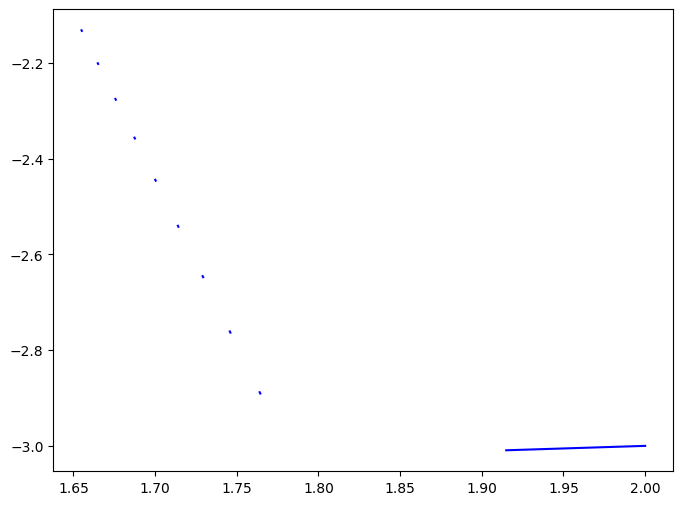

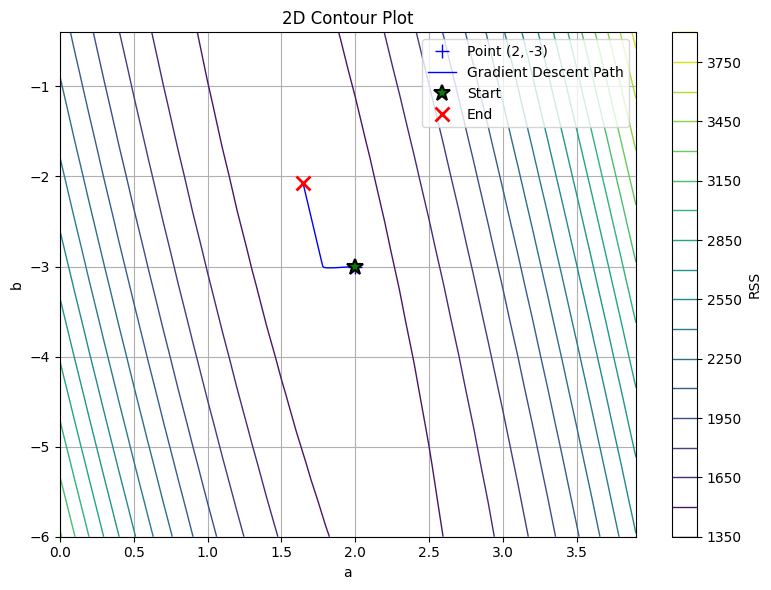

L1 constraint results:
a = 1.6459, b = -2.0695, alpha = 1.5530, s = 0.5381
Constraint verification: |a| + |b| = 3.7153, target c = 7.0000
Loss = 1406.5560


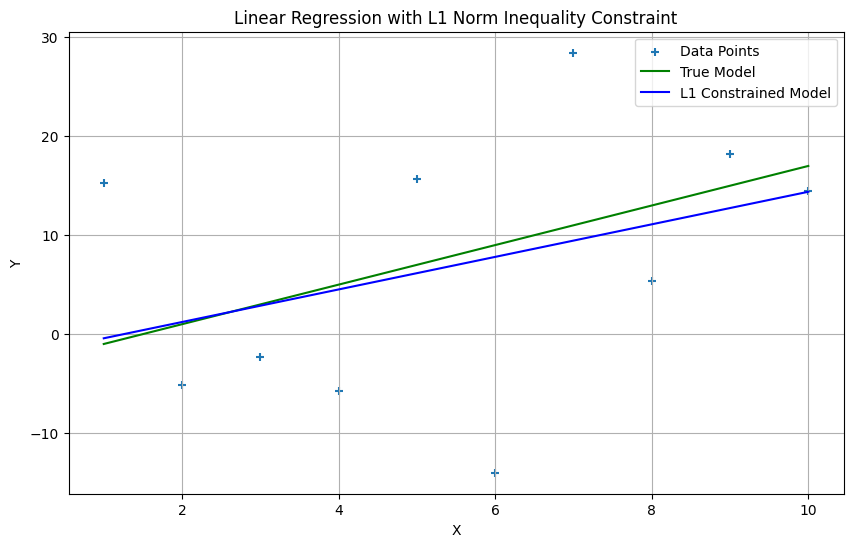

In [252]:
# Set parameters for L1 norm inequality constraint
K = 500
learning_eps = 0.0005
c = (2+1) + (3+1)  # = 7

# Define Lagrangian function for L1 norm inequality constraint using slack variable
def fL1c_inequality(a, b, alpha, s):
    """Lagrangian for L1 norm inequality constraint using slack variable"""
    return f_cost(a, b) + alpha * (abs(a) + abs(b) - c + s**2)

# Define gradient function for the Lagrangian
ffL1c_inequality = lambda a, b, alpha, s: a4ut.grad_rss4(a, b, alpha, s, c, X, Y)

# Initial values
alpha0 = 1
s0 = 1  # Initial slack variable value

# Run gradient descent with L1 norm inequality constraint
a_history_l1c, b_history_l1c, alpha_history_l1c, s_history_l1c = a4ut.grad_desc_rss3(
    K, a0, b0, alpha0, s0, learning_eps, f_cost, fL1c_inequality, ffL1c_inequality, verbose=True
)

# Print the results
print(f"L1 constraint results:")
print(f"a = {a_history_l1c[-1]:.4f}, b = {b_history_l1c[-1]:.4f}, alpha = {alpha_history_l1c[-1]:.4f}, s = {s_history_l1c[-1]:.4f}")
print(f"Constraint verification: |a| + |b| = {abs(a_history_l1c[-1]) + abs(b_history_l1c[-1]):.4f}, target c = {c:.4f}")
print(f"Loss = {f_cost(a_history_l1c[-1], b_history_l1c[-1]):.4f}")

# Create visualization of the result
plt.figure(figsize=(10, 6))
plt.scatter(X, Y, marker='+', label='Data Points')
plt.plot(X, a0 * X + b0, color='g', label='True Model')
plt.plot(X, a_history_l1c[-1] * X + b_history_l1c[-1], color='b', label='L1 Constrained Model')

plt.title('Linear Regression with L1 Norm Inequality Constraint')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Check the original unconstrained solution for L1 constraint
print(f"Original solution: a={a_orig:.4f}, b={b_orig:.4f}")

# Calculate L1 constraint value for the unconstrained solution
c = (2+1) + (3+1)  # = 7
l1_constraint_value = abs(a_orig) + abs(b_orig) - c
print(f"L1 constraint value |a|+|b|-c = {l1_constraint_value:.4f}")

# Check if the unconstrained solution satisfies the L1 constraint
if l1_constraint_value <= 0:
    print("✓ Unconstrained solution already satisfies the L1 constraint (inactive)")
    print("  → KKT satisfied with α = 0 (Case 3a)")
else:
    print("✗ Unconstrained solution violates the L1 constraint")
    print("  → Need active constraint with α > 0 (Case 3b)")
    
    # For case 3b, we need the constrained solution
    # Check the constrained solution from your inequality constraint implementation
    print("\nConstrained solution:")
    print(f"a={a_history_l1c[-1]:.4f}, b={b_history_l1c[-1]:.4f}, α={alpha_history_l1c[-1]:.4f}")
    
    # Calculate constraint value for the constrained solution
    constrained_l1_constraint = abs(a_history_l1c[-1]) + abs(b_history_l1c[-1]) - c
    print(f"L1 constraint value |a|+|b|-c = {constrained_l1_constraint:.6f}")
    
    # Check complementary slackness
    comp_slackness = alpha_history_l1c[-1] * constrained_l1_constraint
    print(f"Complementary slackness α(|a|+|b|-c) = {comp_slackness:.6f}")
    
    # Check gradient condition
    grad_a = -2 * np.sum((Y - (a_history_l1c[-1]*X + b_history_l1c[-1])) * X) + alpha_history_l1c[-1] * np.sign(a_history_l1c[-1])
    grad_b = -2 * np.sum(Y - (a_history_l1c[-1]*X + b_history_l1c[-1])) + alpha_history_l1c[-1] * np.sign(b_history_l1c[-1])
    print(f"Gradient conditions: ∂L/∂a = {grad_a:.6f}, ∂L/∂b = {grad_b:.6f}")



Original solution: a=1.5226, b=-1.2234
L1 constraint value |a|+|b|-c = -4.2540
✓ Unconstrained solution already satisfies the L1 constraint (inactive)
  → KKT satisfied with α = 0 (Case 3a)


L1 constraint (numerical): a=2.07 b=-4.93 loss=1426.29 |a| + |b| = 7.00 == c=7.00


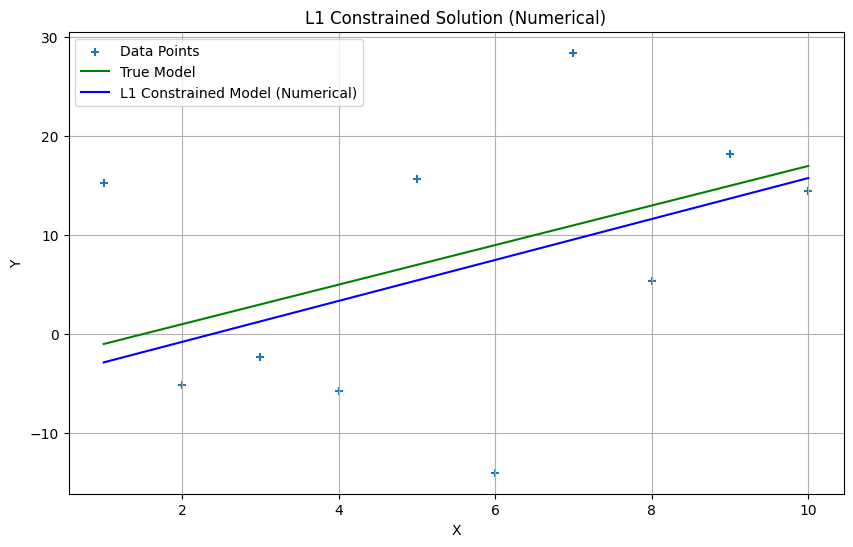

In [254]:

from scipy.optimize import minimize

def l1_constraint(x):
    a, b = x
    return abs(a) + abs(b) - c

# Define constraints
constraints = [{'type': 'eq', 'fun': l1_constraint}]

# Initial guess
x0 = [a0, b0]

# Objective function
def objective(x):
    a, b = x
    return sum((Y - (a * X + b))**2)

# Solve the constrained optimization problem
result = minimize(objective, x0, constraints=constraints, method='SLSQP')

# Get the optimal values
a_hat, b_hat = result.x
print(f"L1 constraint (numerical): a={a_hat:.2f} b={b_hat:.2f} loss={objective([a_hat, b_hat]):.2f}",
     f"|a| + |b| = {abs(a_hat) + abs(b_hat):.2f} == c={c:.2f}")

# Visualize
plt.figure(figsize=(10, 6))
plt.scatter(X, Y, marker='+', label='Data Points')
plt.plot(X, a0*X + b0, color='g', label='True Model')
plt.plot(X, a_hat*X + b_hat, color='b', label='L1 Constrained Model (Numerical)')
plt.title(f'L1 Constrained Solution (Numerical)')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()

## Regularization of underconstraint problems

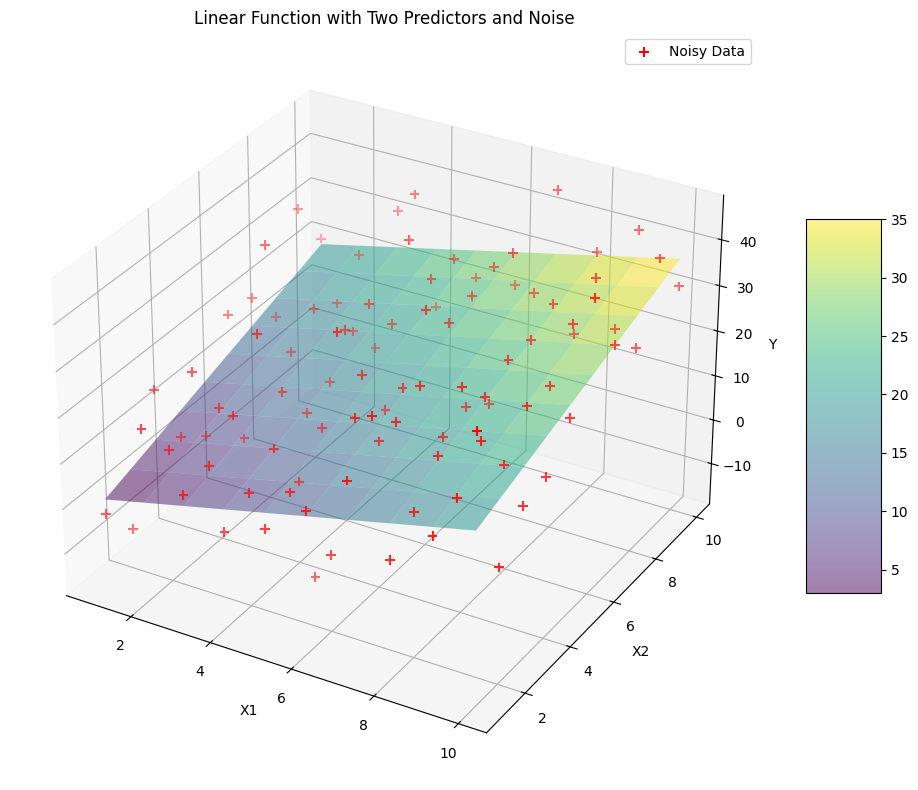

In [259]:


# Set parameters
N = 10  # Size of the grid
a10 = 2  # First coefficient
a20 = 2  # Second coefficient
b0 = -3  # Intercept

# Generate all combinations of X1 and X2 using product (equivalent to fullfact)
# Note: In MATLAB fliplr(fullfact([N N])) gives coordinate pairs in reverse order
coordinates = list(product(range(1, N+1), range(1, N+1)))
X1 = np.array([coord[0] for coord in coordinates])
X2 = np.array([coord[1] for coord in coordinates])

# Define the true function without noise
f0 = lambda x1, x2: a10*x1 + a20*x2 + b0

# Generate random noise
R = np.random.normal(0, 10, N*N)

# Generate Y with noise
Y = np.array([f0(x1, x2) + r for x1, x2, r in zip(X1, X2, R)])

# Create meshgrid for surface plot
A, B = np.meshgrid(range(1, N+1), range(1, N+1))
Z = a10*A + a20*B + b0

# Create 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the true surface
surf = ax.plot_surface(A, B, Z, alpha=0.5, cmap='viridis')


# Plot the noisy data points
ax.scatter(X1, X2, Y, c='r', marker='+', s=50, label='Noisy Data')

# Set labels and title
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
ax.set_title('Linear Function with Two Predictors and Noise')

# Add colorbar
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)

plt.legend()
plt.tight_layout()
plt.show()

Initial RSS with true parameters: 6941.23
RSS after direct regression: 6565.60
Learned parameters: b=-6.4413, a1=2.1580, a2=2.6028
True parameters: b=-3, a1=2, a2=2
RSS with scikit-learn: 6565.60
scikit-learn coefficients: [-6.44126885  2.15797407  2.60283601]


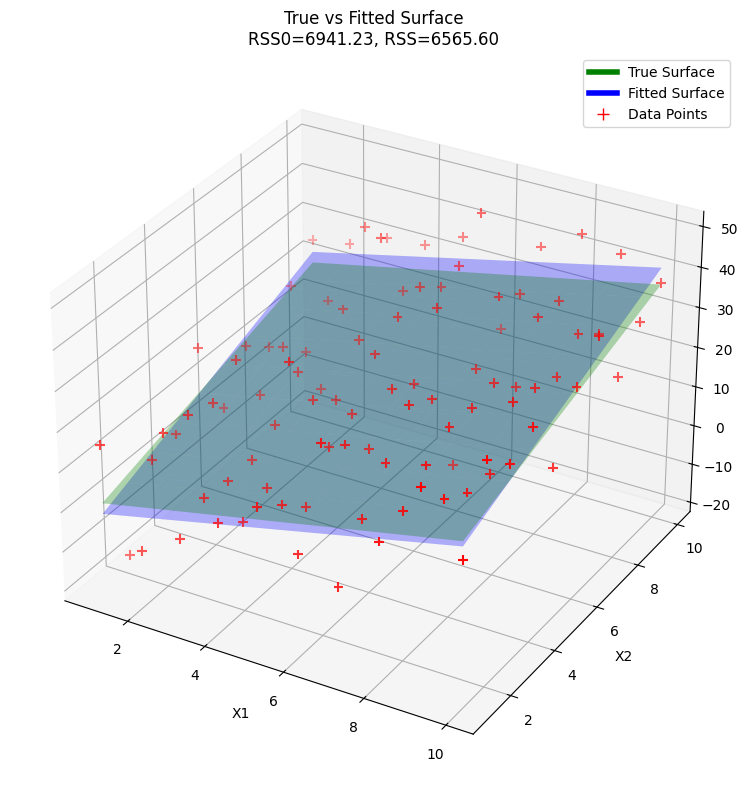

In [ ]:

# Create design matrix with intercept column
XS = np.column_stack((np.ones(N*N), X1, X2))

# Initial parameters
w0 = np.array([b0, a10, a20])

# Calculate initial RSS
RSS0 = np.sum((Y - XS @ w0) ** 2)
print(f"Initial RSS with true parameters: {RSS0:.2f}")

# Method 1: Direct computation 
w = np.linalg.inv(XS.T @ XS) @ XS.T @ Y
RSS = np.sum((Y - XS @ w) ** 2)
print(f"RSS after direct regression: {RSS:.2f}")
print(f"Learned parameters: b={w[0]:.4f}, a1={w[1]:.4f}, a2={w[2]:.4f}")
print(f"True parameters: b={b0}, a1={a10}, a2={a20}")

# Method 2: Using scikit-learn (alternative approach)
model = LinearRegression(fit_intercept=False)  # We already included the intercept column
model.fit(XS, Y)
Y_pred = model.predict(XS)
RSS_sk = np.sum((Y - Y_pred) ** 2)
print(f"RSS with scikit-learn: {RSS_sk:.2f}")
print(f"scikit-learn coefficients: {model.coef_}")

# Compare the true surface with the fitted surface
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot true surface
A, B = np.meshgrid(range(1, N+1), range(1, N+1))
Z_true = a10*A + a20*B + b0
surf_true = ax.plot_surface(A, B, Z_true, alpha=0.3, color='green', label='True Surface')

# Plot fitted surface
Z_fit = w[1]*A + w[2]*B + w[0]
surf_fit = ax.plot_surface(A, B, Z_fit, alpha=0.3, color='blue', label='Fitted Surface')

# Plot data points
ax.scatter(X1, X2, Y, c='r', marker='+', s=50, label='Noisy Data')

# Set labels and title
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
ax.set_title(f'True vs Fitted Surface\nRSS0={RSS0:.2f}, RSS={RSS:.2f}')

# Create a custom legend for the surfaces

custom_lines = [
    Line2D([0], [0], color='green', lw=4),
    Line2D([0], [0], color='blue', lw=4),
    Line2D([0], [0], color='red', marker='+', lw=0, markersize=8)
]
ax.legend(custom_lines, ['True Surface', 'Fitted Surface', 'Data Points'])

plt.tight_layout()
plt.show()

Initial RSS with true parameters (undersampled): 836.77
RSS after pseudo-inverse (undersampled): 698.18
Learned parameters: b=-3.9466, a1=-3.9466, a2=3.2938
True parameters: b=-3, a1=2, a2=2


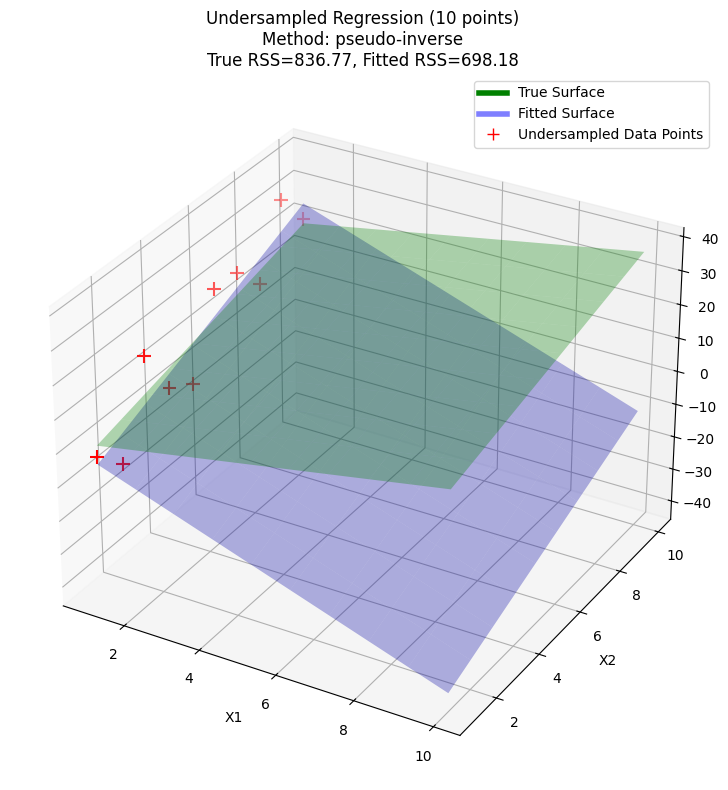

In [267]:
def fit_undersampled_model(X1, X2, Y, true_params, n_samples=10):
    """
    Fit a linear model to undersampled data and compare with the true model.
    
    Parameters:
    ----------
    X1, X2 : array-like
        The predictor variables
    Y : array-like
        The target variable
    true_params : tuple
        (b0, a10, a20) - The true parameters of the model
    n_samples : int, default=10
        Number of samples to use for the undersampled dataset
    
    Returns:
    -------
    dict
        A dictionary containing the fitted parameters, RSS values, and other relevant info
    """
    N = 10  # Number of distinct X1/X2 values
    b0, a10, a20 = true_params
    
    # Extract first n_samples samples
    uXX = np.column_stack((X1[:n_samples], X2[:n_samples]))
    uY = Y[:n_samples]
    
    # Create design matrix with intercept
    uXS = np.column_stack((np.ones(n_samples), uXX))
    
    # Calculate initial RSS with true parameters
    w0 = np.array([b0, a10, a20])
    RSS0 = np.sum((uY - uXS @ w0) ** 2)
    
    results = {
        'true_params': w0,
        'RSS0': RSS0,
        'uXS': uXS,
        'uY': uY,
        'n_samples': n_samples,
        'success': False
    }
    
    # Try direct computation first
    try:
        w = np.linalg.inv(uXS.T @ uXS) @ uXS.T @ uY
        RSS = np.sum((uY - uXS @ w) ** 2)
        results.update({
            'w': w,
            'RSS': RSS,
            'method': 'direct inversion',
            'success': True
        })
    except np.linalg.LinAlgError as e:
        # Fall back to pseudo-inverse if direct inversion fails
        try:
            w = np.linalg.pinv(uXS.T @ uXS) @ uXS.T @ uY
            RSS = np.sum((uY - uXS @ w) ** 2)
            results.update({
                'w': w,
                'RSS': RSS,
                'method': 'pseudo-inverse',
                'success': True,
                'error': str(e)
            })
        except Exception as e2:
            results.update({
                'error': f"Direct inversion failed: {str(e)}. Pseudo-inverse also failed: {str(e2)}",
            })
    
    return results

def visualize_undersampled_model(X1, X2, Y, results, true_params):
    """
    Visualize the undersampled model fitting results.
    
    Parameters:
    ----------
    X1, X2 : array-like
        Full predictor variables
    Y : array-like
        Full target variable
    results : dict
        Results from fit_undersampled_model
    true_params : tuple
        (b0, a10, a20) - True parameters of the model
    
    Returns:
    -------
    fig : matplotlib Figure
        The created figure
    """
    b0, a10, a20 = true_params
    n_samples = results['n_samples']
    
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    # Plot the undersampled data points
    ax.scatter(X1[:n_samples], X2[:n_samples], Y[:n_samples], 
               c='r', marker='+', s=100, label='Undersampled Data')
    
    # Create meshgrid for surfaces
    N = 10  # Number of distinct X1/X2 values
    A, B = np.meshgrid(range(1, N+1), range(1, N+1))
    
    # Plot true surface
    Z_true = a10*A + a20*B + b0
    surf_true = ax.plot_surface(A, B, Z_true, alpha=0.3, color='green')
    
    # Plot fitted surface if available
    if results['success']:
        w = results['w']
        Z_fit = w[1]*A + w[2]*B + w[0]
        surf_fit = ax.plot_surface(A, B, Z_fit, alpha=0.3, color='blue')
        
        # Set title with method and results
        title = (f'Undersampled Regression ({n_samples} points)\n'
                 f'Method: {results["method"]}\n'
                 f'True RSS={results["RSS0"]:.2f}, Fitted RSS={results["RSS"]:.2f}')
    else:
        title = (f'Undersampled Regression ({n_samples} points)\n'
                 f'Error: {results["error"]}\n'
                 f'True RSS={results["RSS0"]:.2f}')
    
    # Set labels and title
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_zlabel('Y')
    ax.set_title(title)
    
    # Create a custom legend
    custom_lines = [
        Line2D([0], [0], color='green', lw=4),
        Line2D([0], [0], color='blue', lw=4, alpha=0.5),
        Line2D([0], [0], color='red', marker='+', lw=0, markersize=8)
    ]
    
    # Adjust legend based on success
    if results['success']:
        ax.legend(custom_lines, 
                 ['True Surface', 'Fitted Surface', 'Undersampled Data Points'])
    else:
        ax.legend([custom_lines[0], custom_lines[2]], 
                 ['True Surface', 'Undersampled Data Points'])
    
    plt.tight_layout()
    return fig

# Example usage:
true_params = (b0, a10, a20)
results = fit_undersampled_model(X1, X2, Y, true_params, n_samples=10)

# Print results
print(f"Initial RSS with true parameters (undersampled): {results['RSS0']:.2f}")

if results['success']:
    w = results['w']
    print(f"RSS after {results['method']} (undersampled): {results['RSS']:.2f}")
    print(f"Learned parameters: b={w[0]:.4f}, a1={w[1]:.4f}, a2={w[2]:.4f}")
else:
    print(f"Error: {results['error']}")

print(f"True parameters: b={b0}, a1={a10}, a2={a20}")

# Visualize
fig = visualize_undersampled_model(X1, X2, Y, results, true_params)
plt.show()

RSS with Ridge Regression (alpha=0.1): 698.27
Regularized parameters: b=-3.8460, a1=-3.8460, a2=3.2642
True parameters: b=-3, a1=2, a2=2


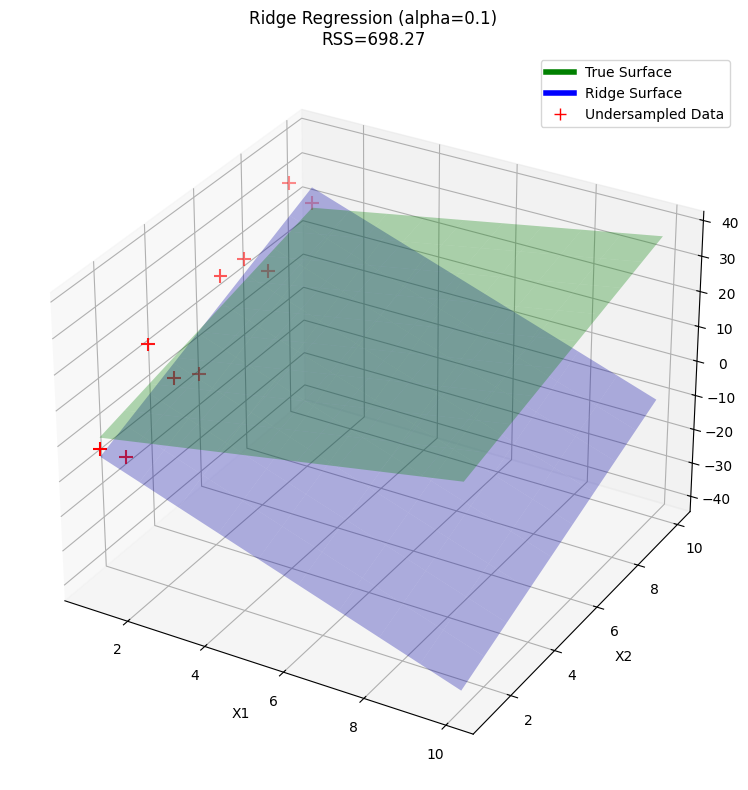

In [261]:
# Set regularization parameter
alpha = 0.1

# Create identity matrix of appropriate size
I = np.eye(3)  # 3×3 identity matrix for our 3 parameters (intercept, a1, a2)

# Perform Ridge Regression (regularized regression)
w_ridge = np.linalg.inv(uXS.T @ uXS + alpha * I) @ uXS.T @ uY

# Calculate RSS with the regularized solution
RSS_ridge = np.sum((uY - uXS @ w_ridge) ** 2)
print(f"RSS with Ridge Regression (alpha={alpha}): {RSS_ridge:.2f}")
print(f"Regularized parameters: b={w_ridge[0]:.4f}, a1={w_ridge[1]:.4f}, a2={w_ridge[2]:.4f}")

# Compare with true parameters
print(f"True parameters: b={b0}, a1={a10}, a2={a20}")

# Visualize the regularized solution
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the undersampled data points
ax.scatter(X1[:10], X2[:10], Y[:10], c='r', marker='+', s=100, label='Undersampled Data')

# Plot true surface
A, B = np.meshgrid(range(1, N+1), range(1, N+1))
Z_true = a10*A + a20*B + b0
surf_true = ax.plot_surface(A, B, Z_true, alpha=0.3, color='green', label='True Surface')

# Plot regularized surface
Z_ridge = w_ridge[1]*A + w_ridge[2]*B + w_ridge[0]
surf_ridge = ax.plot_surface(A, B, Z_ridge, alpha=0.3, color='blue', label='Ridge Surface')

# Set labels and title
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
ax.set_title(f'Ridge Regression (alpha={alpha})\nRSS={RSS_ridge:.2f}')

# Create a custom legend
from matplotlib.lines import Line2D
custom_lines = [
    Line2D([0], [0], color='green', lw=4),
    Line2D([0], [0], color='blue', lw=4),
    Line2D([0], [0], color='red', marker='+', lw=0, markersize=8)
]
ax.legend(custom_lines, ['True Surface', 'Ridge Surface', 'Undersampled Data'])

plt.tight_layout()
plt.show()